### Codio Activity 16.1: Polynomial Features and Classification

**Expected Time = 30 minutes** 

**Total Points = 30**

This activity focuses on comparing versions of logistic regression classifier on a wine dataset from scikitlearn.  Your goal is to understand how the performance changes and the decision boundary is effected.  


#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display="diagram")
import seaborn as sns

In [2]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
X1 = X[['total_phenols', 'color_intensity']]

<AxesSubplot:xlabel='total_phenols', ylabel='color_intensity'>

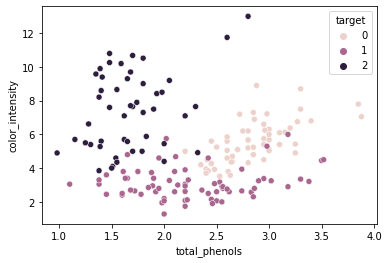

In [5]:
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y)

[Back to top](#-Index)

### Problem 1

#### Logistic Regression

**10 Points**

Below, fit a `LogisticRegression` estimator with `multi_class = 'multinomial'` on `X1` and `y`.  Uncomment the code to visualize the decision boundary of the resulting estimator assigned to `lgr` below.

In [6]:
### GRADED
lgr = ''
    
# YOUR CODE HERE
#raise NotImplementedError()
lgr = LogisticRegression(multi_class = 'multinomial').fit(X1, y)

### ANSWER CHECK
lgr

LogisticRegression(multi_class='multinomial')

/home/codio/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='total_phenols', ylabel='color_intensity'>

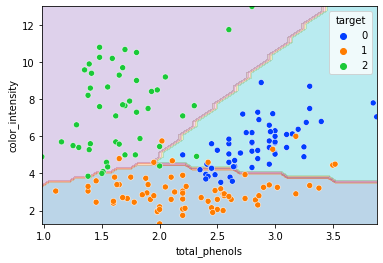

In [7]:
# Uncomment to visualize the decision boundary for lgr
xx = np.linspace(X1.iloc[:, 0].min(), X1.iloc[:, 0].max(), 50)
yy = np.linspace(X1.iloc[:, 1].min(), X1.iloc[:, 1].max(), 50)
XX, YY = np.meshgrid(xx, yy)
grid = np.c_[XX.ravel(), YY.ravel()]
labels = pd.factorize(lgr.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

In [8]:
xx, yy

(array([0.98      , 1.03918367, 1.09836735, 1.15755102, 1.21673469,
        1.27591837, 1.33510204, 1.39428571, 1.45346939, 1.51265306,
        1.57183673, 1.63102041, 1.69020408, 1.74938776, 1.80857143,
        1.8677551 , 1.92693878, 1.98612245, 2.04530612, 2.1044898 ,
        2.16367347, 2.22285714, 2.28204082, 2.34122449, 2.40040816,
        2.45959184, 2.51877551, 2.57795918, 2.63714286, 2.69632653,
        2.7555102 , 2.81469388, 2.87387755, 2.93306122, 2.9922449 ,
        3.05142857, 3.11061224, 3.16979592, 3.22897959, 3.28816327,
        3.34734694, 3.40653061, 3.46571429, 3.52489796, 3.58408163,
        3.64326531, 3.70244898, 3.76163265, 3.82081633, 3.88      ]),
 array([ 1.28      ,  1.51918367,  1.75836735,  1.99755102,  2.23673469,
         2.47591837,  2.71510204,  2.95428571,  3.19346939,  3.43265306,
         3.67183673,  3.91102041,  4.15020408,  4.38938776,  4.62857143,
         4.8677551 ,  5.10693878,  5.34612245,  5.58530612,  5.8244898 ,
         6.06367347,  6.30

In [9]:
np.meshgrid(xx, yy)
XX, YY

(array([[0.98      , 1.03918367, 1.09836735, ..., 3.76163265, 3.82081633,
         3.88      ],
        [0.98      , 1.03918367, 1.09836735, ..., 3.76163265, 3.82081633,
         3.88      ],
        [0.98      , 1.03918367, 1.09836735, ..., 3.76163265, 3.82081633,
         3.88      ],
        ...,
        [0.98      , 1.03918367, 1.09836735, ..., 3.76163265, 3.82081633,
         3.88      ],
        [0.98      , 1.03918367, 1.09836735, ..., 3.76163265, 3.82081633,
         3.88      ],
        [0.98      , 1.03918367, 1.09836735, ..., 3.76163265, 3.82081633,
         3.88      ]]),
 array([[ 1.28      ,  1.28      ,  1.28      , ...,  1.28      ,
          1.28      ,  1.28      ],
        [ 1.51918367,  1.51918367,  1.51918367, ...,  1.51918367,
          1.51918367,  1.51918367],
        [ 1.75836735,  1.75836735,  1.75836735, ...,  1.75836735,
          1.75836735,  1.75836735],
        ...,
        [12.52163265, 12.52163265, 12.52163265, ..., 12.52163265,
         12.52163265, 12

[Back to top](#-Index)

### Problem 2

#### Logistic Regression with Quadratic Features

**10 Points**

Below, create and fit a `Pipeline` named `quad_pipe` with steps: 

- `poly`: Create quadratic features with `PolynomialFeatures` with no bias
- `scale`: `StandardScaler` applied to polynomial features
- `lgr`: `LogisticRegression` with `multi_class = 'multinomial'`

Visualize the decision boundary by uncommenting the code below.

In [10]:
### GRADED
quad_pipe = ''
    
# YOUR CODE HERE
#raise NotImplementedError()
quad_pipe = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scale', StandardScaler()),
    ('lgr', LogisticRegression(multi_class = 'multinomial'))
]).fit(X1, y)

### ANSWER CHECK
quad_pipe

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scale', StandardScaler()),
                ('lgr', LogisticRegression(multi_class='multinomial'))])

/home/codio/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='total_phenols', ylabel='color_intensity'>

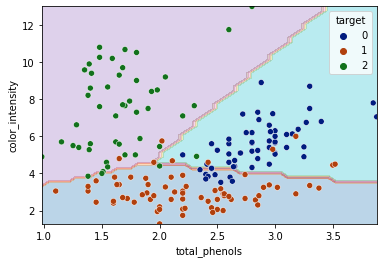

In [11]:
# Uncomment to visualize lgr boundary
labels = pd.factorize(lgr.predict(grid))[0]
plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y, palette = 'dark')

/home/codio/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='total_phenols', ylabel='color_intensity'>

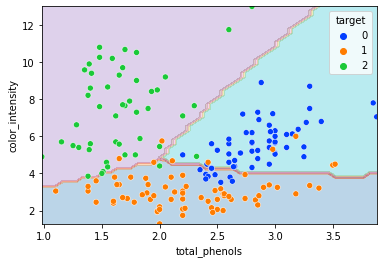

In [12]:
# Uncomment to visualize the decision boundary for quad_pipe
labels = pd.factorize(quad_pipe.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')

[Back to top](#-Index)

### Problem 3

#### Logistic Regression with Degree 5 features

**10 Points**

Finally, create a pipeline named `quintic_pipe` with polynomial features of degree 5 and visualize the decision boundary. Use the same named steps as above. 

In [13]:
### GRADED
quintic_pipe = ''
    
# YOUR CODE HERE
#raise NotImplementedError()
quintic_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scale', StandardScaler()),
    ('lgr', LogisticRegression(multi_class = 'multinomial'))
]).fit(X1, y)

### ANSWER CHECK
quintic_pipe

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scale', StandardScaler()),
                ('lgr', LogisticRegression(multi_class='multinomial'))])

/home/codio/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='total_phenols', ylabel='color_intensity'>

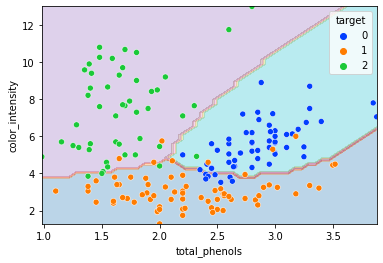

In [14]:
# Uncomment to visualize the decision boundary for quintic_pipe
labels = pd.factorize(quintic_pipe.predict(grid))[0]

plt.contourf(xx, yy, labels.reshape(XX.shape), cmap = 'tab10', alpha = 0.3)
sns.scatterplot(data = X1, x = 'total_phenols', y = 'color_intensity', hue = y,  palette = 'bright')